# Aakash Paul

# The Spark Foundation 
##  #1 Task Sybmission : EDA-Terrorism

## Importing necessary libraries

In [1]:
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## importing the Terrorism Dataset

In [2]:
t = pd.read_csv('terrorism.csv',encoding='ISO-8859-1')

C:\Users\inspiron\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



## Some Data Processing

In [3]:
t.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [6]:
t.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
t.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
terror=t[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

## Some Basic Information

In [10]:
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) 
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Year with the most attacks: 2014
Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


## Basic analysis of the nature of Terrorist Attacks and the people affected

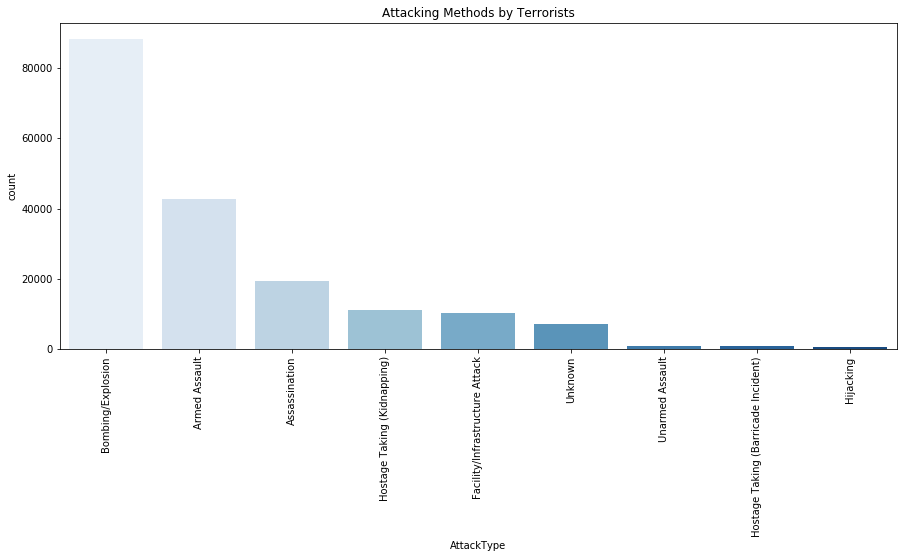

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='Blues',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

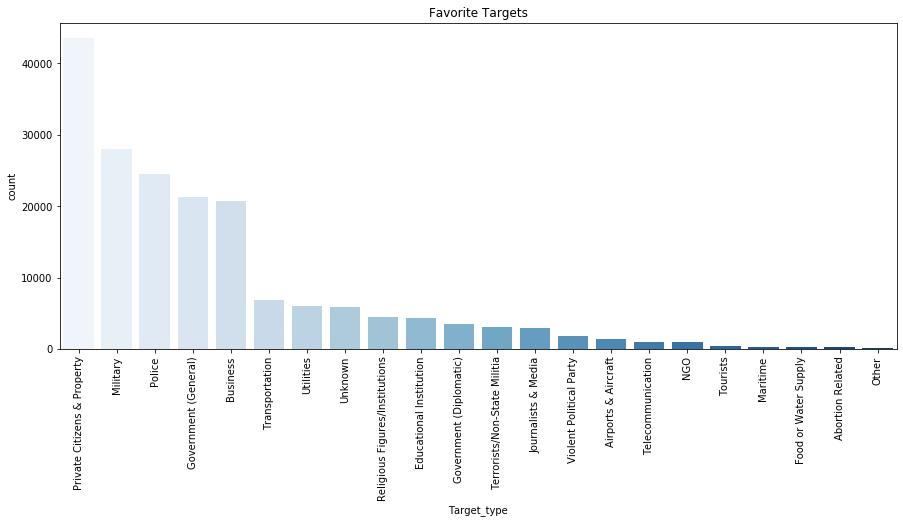

In [36]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='Blues',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

C:\Users\inspiron\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



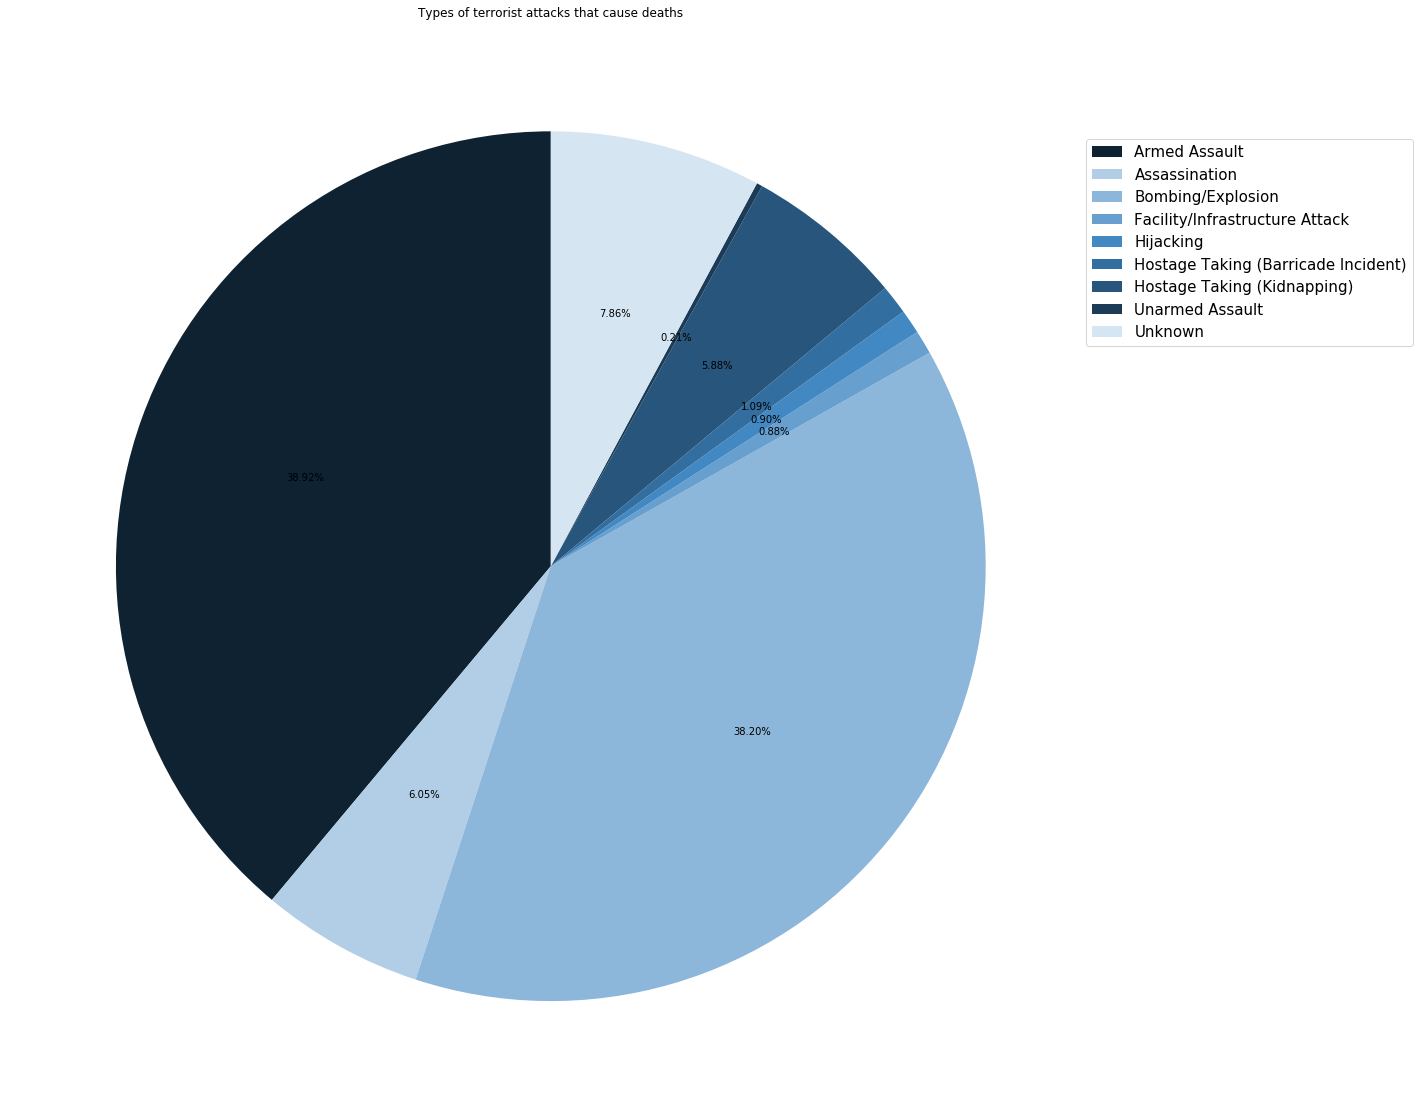

In [37]:
killData = terror.loc[:,'Killed']
attackData = terror.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
labels = typeKillFormatData.columns.tolist()
transpoze = typeKillFormatData.T 
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))

colors = ['#0f2231','#b1cee6','#8cb6da','#679fce','#4288c2','#336ea0','#27557b','#1b3b56','#d6e5f2']

plt.pie(values, startangle=90, autopct='%.2f%%',colors = colors)
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15)
plt.show()

## Time series Analysis-->
###  How Terrorist activites have evoved over a period of 50 years

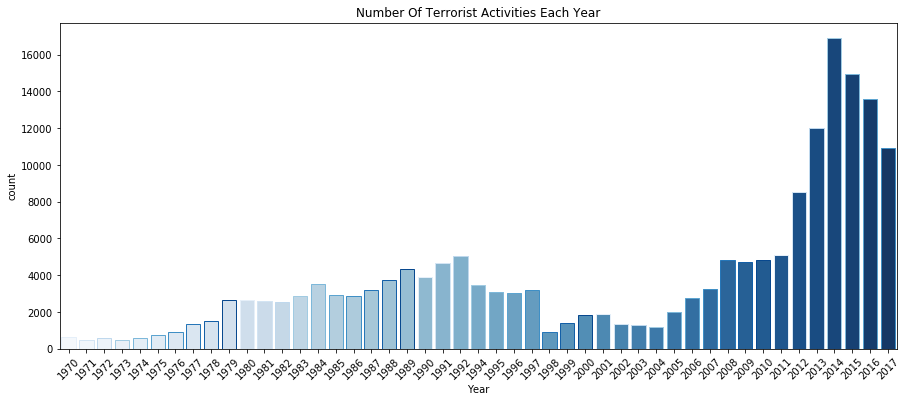

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='Blues',edgecolor=sns.color_palette("Blues", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

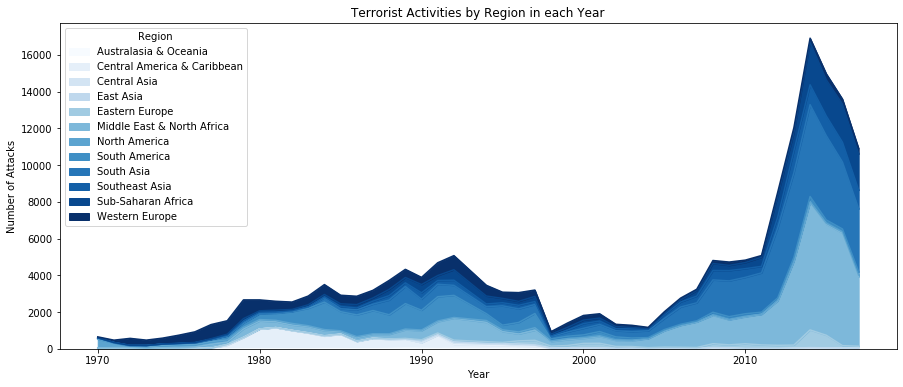

In [12]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6),colormap='Blues')
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

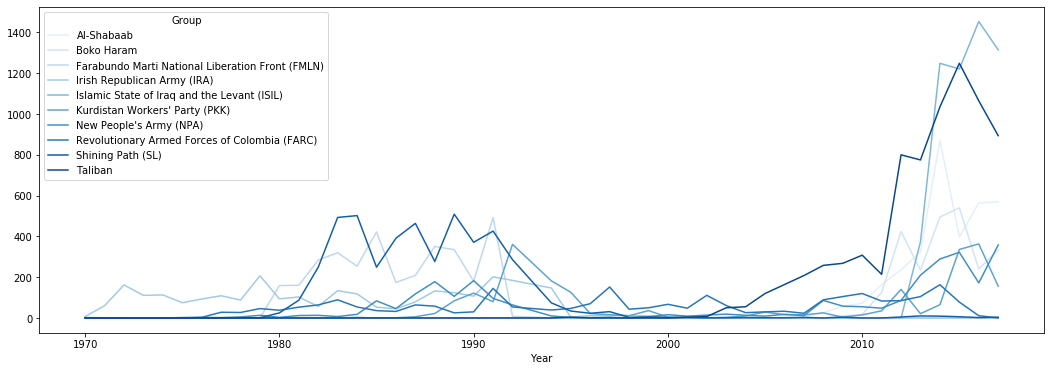

In [38]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Blues',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## Variation in Terrorist attacks depending upon the geographical Location

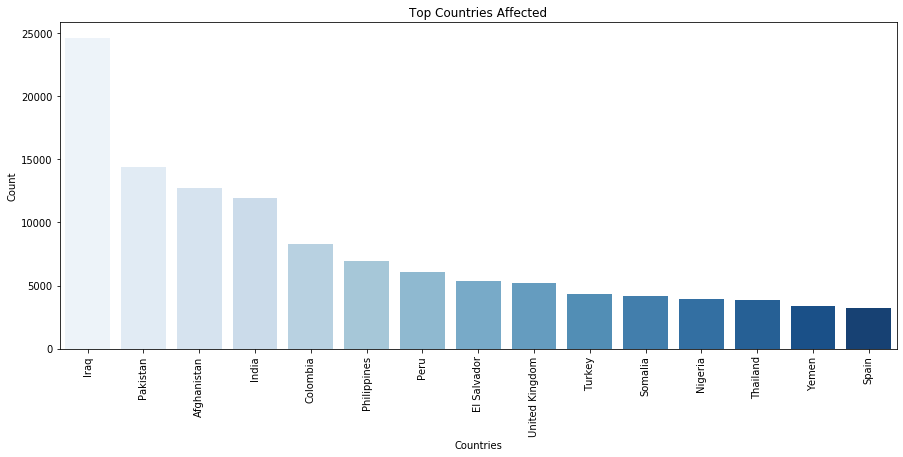

In [15]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

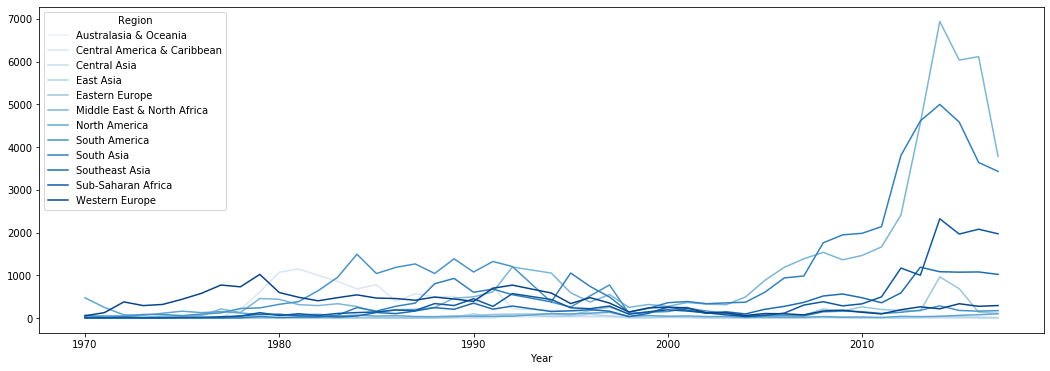

In [16]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Blues',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

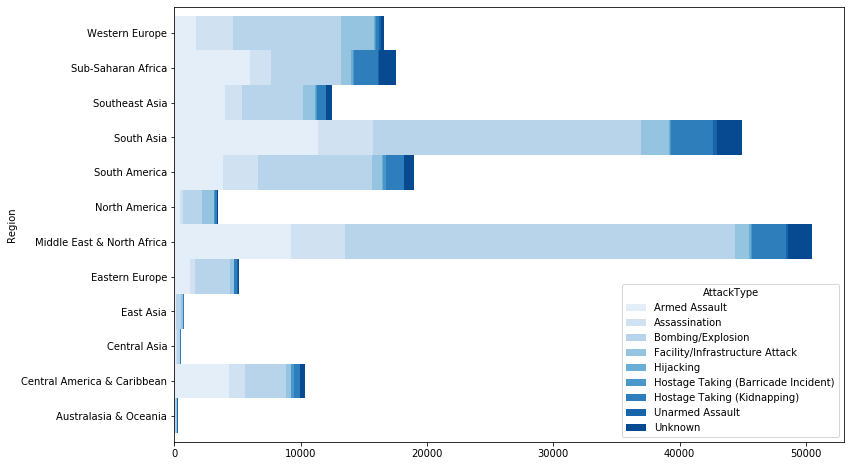

In [17]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('Blues',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

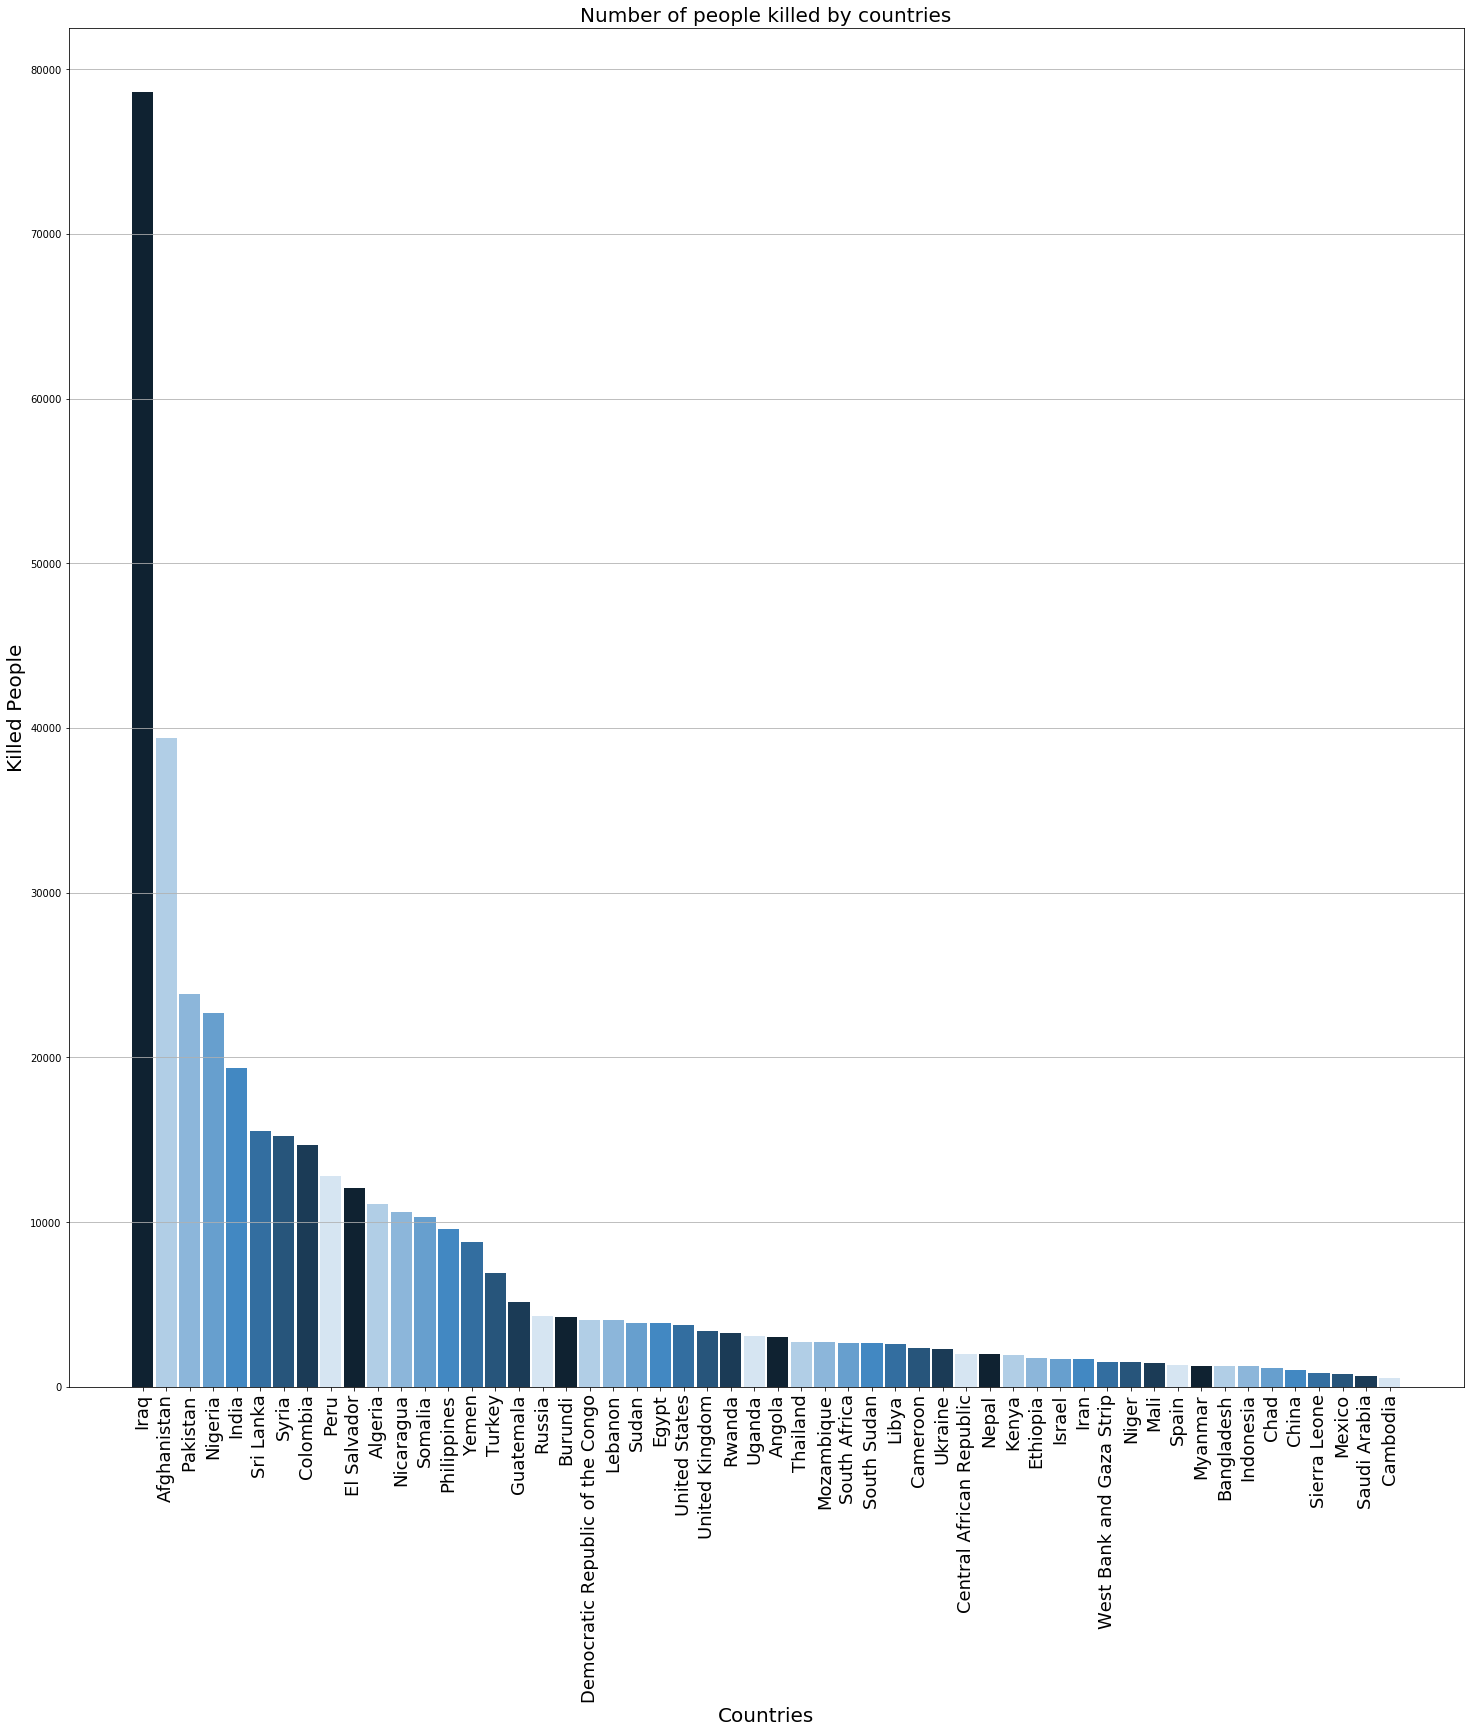

In [39]:
#Number of Killed in Terrorist Attacks by Countries
countryData = terror.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)

countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData=countryKillFormatData.T.sort_values(by = 'Killed',ascending = False)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

labels = np.array(list(countryKillFormatData.index.values))
labels = labels[:54]
values = np.array(countryKillFormatData[0:54])
values=values.reshape(54,)
index = np.arange(len(labels))
colors = ['#0f2231','#b1cee6','#8cb6da','#679fce','#4288c2','#336ea0','#27557b','#1b3b56','#d6e5f2']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

## Some Trends in various terrorist organisations

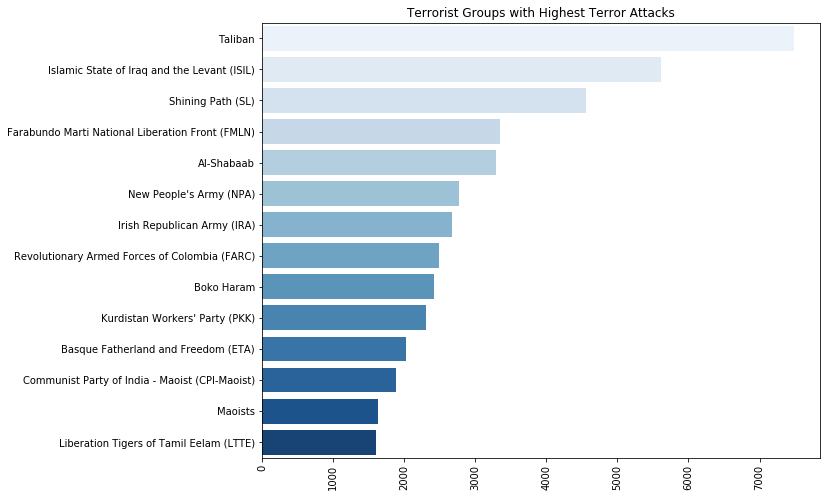

In [18]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('Blues'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

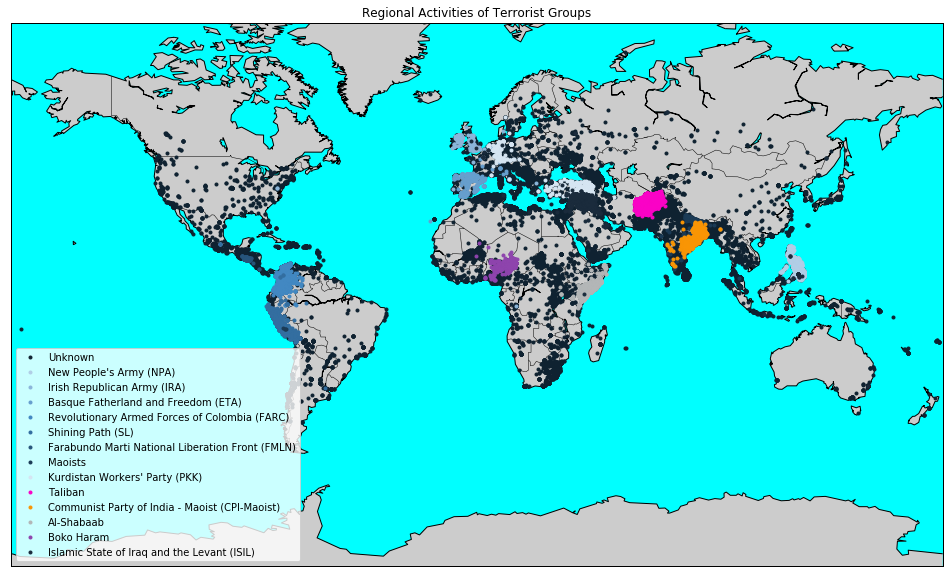

In [31]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\inspiron\Anaconda3\pkgs\proj4-5.2.0-h6538335_1006\Library\share'
from mpl_toolkits.basemap import Basemap


top_groups=terror[terror['Group'].isin(terror['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['#0f2231','#b1cee6','#8cb6da','#679fce','#4288c2','#336ea0','#27557b','#1b3b56','#d6e5f2','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()